In [34]:
from sklearn.datasets import make_classification
X,y = make_classification(n_samples=100,n_classes=2,n_clusters_per_class=1,n_informative=1,n_redundant=0,n_features=2,hypercube=False,random_state=41,class_sep=10)

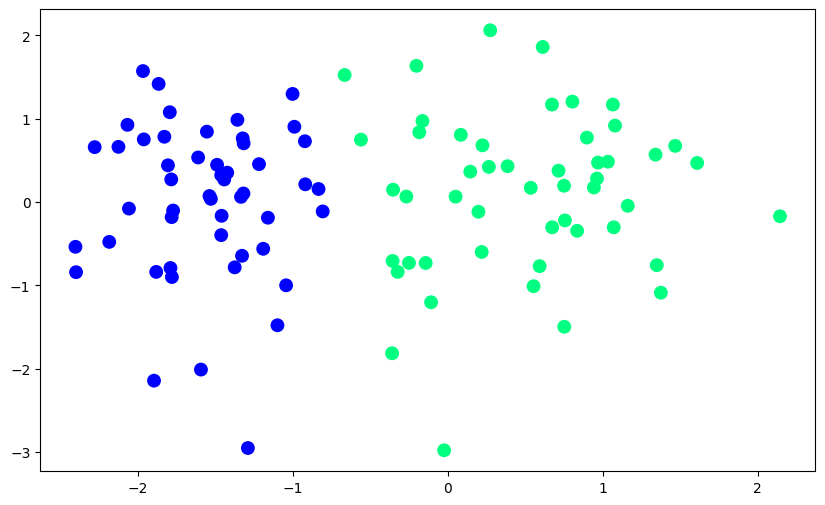

In [35]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap ="winter",s=80)

In [36]:
for i in range(len(y)):
    if y[i] == 0:
        y[i]=-1
y

array([ 1,  1,  1, -1,  1, -1, -1,  1,  1, -1, -1, -1,  1,  1, -1,  1,  1,
       -1,  1, -1, -1, -1, -1,  1, -1,  1, -1, -1, -1, -1, -1,  1,  1,  1,
        1,  1, -1,  1, -1,  1, -1, -1, -1,  1, -1,  1,  1, -1, -1, -1,  1,
        1, -1,  1,  1, -1,  1, -1, -1,  1,  1, -1, -1,  1,  1,  1, -1,  1,
       -1, -1, -1,  1,  1, -1,  1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1,
       -1, -1, -1,  1, -1,  1,  1, -1, -1,  1, -1, -1, -1,  1,  1])

In [37]:
##imports
import numpy as np
import random

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.2,random_state=42)

In [39]:
y_train

array([-1,  1, -1, -1, -1,  1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1,
        1,  1,  1, -1,  1,  1, -1, -1, -1,  1,  1, -1,  1, -1, -1, -1, -1,
        1, -1, -1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1,  1,
       -1, -1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1, -1,  1,
        1, -1,  1,  1, -1, -1, -1,  1,  1, -1, -1,  1])

In [176]:
class Perceptron:
    def __init__(self):
        self._intercept=None
        self._coef = None


    def improve(self,w,X,y,j):
        lr=0.01
        for i in range(len(w)):
            w[i] -= lr*(-y[j]*X[j][i])
        return w
  
    def fit(self,X,y):
        weights = np.ones(X.shape[1]+1)
        X= np.insert(X,0,1,axis=1)
        for i in range(1000):
            for j in range(X.shape[0]):
                distance = np.dot(weights,X[j])
                check =y[j]*distance
                if check < 0:
                    weights = self.improve(weights,X,y,j)
        self._intercept = weights[0]
        self._coef = weights[1:]
        
            
        
p =Perceptron()
p.fit(X,y)

In [177]:

y_test

array([ 1,  1, -1,  1, -1,  1, -1,  1, -1,  1,  1, -1, -1,  1,  1,  1, -1,
        1,  1,  1])

In [178]:
X_test

array([[ 1.37645492, -1.08933729],
       [ 0.94415309,  0.17388705],
       [-2.39664251, -0.84276652],
       [ 1.08059816,  0.91694693],
       [-0.80540713, -0.11323563],
       [ 0.75727194, -0.22100631],
       [-1.31690551,  0.10216193],
       [-0.16186654,  0.97247545],
       [-1.77828947, -0.90114581],
       [ 0.19924745, -0.11697552],
       [-0.18232911,  0.83727062],
       [-1.44075613,  0.27047889],
       [-1.4577388 , -0.1656085 ],
       [ 0.53688527,  0.17018845],
       [ 0.75163482,  0.19492133],
       [-0.20083951,  1.63493163],
       [-2.18254559, -0.4788978 ],
       [ 0.96395115,  0.28128262],
       [-0.02194151, -2.98092432],
       [ 1.34989978, -0.75869267]])

In [179]:
weights = p._coef
weights=np.insert(weights,0,p._intercept)
weights


array([0.93      , 1.2978027 , 0.23314214])

In [180]:
def step(x):
    return 1 if x>0 else -1

In [181]:
def get_predictions(X):
    predictions = []
    X=np.insert(X,0,1,axis=1)
    for i in range(len(X)):
        
        prediction = step(np.dot(weights,X[i]))
        predictions.append(prediction)
    return predictions
preds = get_predictions(X)

In [182]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y,preds))

1.0


In [183]:
m = -p._coef[0]/p._coef[1]
b = -p._intercept/p._coef[1]
x_input = np.linspace(-3,3,100)
y_input = m*x_input +b

(-3.0, 2.0)

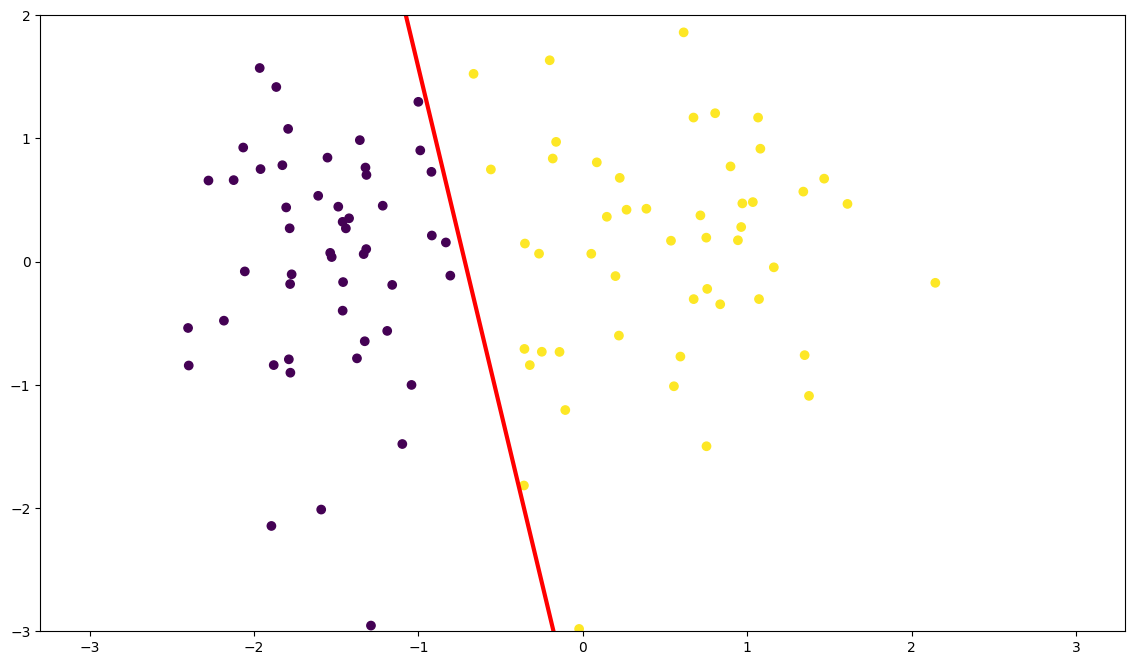

In [185]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,8))
plt.scatter(X[:,0],X[:,1],c=y)
plt.plot(x_input,y_input,color="red",linewidth =3)
plt.ylim(-3,2)